<a href="https://colab.research.google.com/github/rapu34/A1project/blob/main/A1project_EDA_Bidding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
import gc

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (3,843 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
bidding_result = pd.read_csv("/content/drive/MyDrive/A1project/bidding_result.csv", encoding='UTF8')
#log = pd.read_csv("/content/drive/MyDrive/A1project/log_csv.csv", encoding='UTF8')

In [ ]:
bidding_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337088 entries, 0 to 1337087
Data columns (total 14 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   index            1337088 non-null  int64  
 1   Impression       1337088 non-null  int64  
 2   Click            1337088 non-null  int64  
 3   Cost             1337088 non-null  float64
 4   Sum of AD rank   1337078 non-null  float64
 5   Bid              1337088 non-null  int64  
 6   Price(PC)        1337088 non-null  int64  
 7   Price(Mobile)    1337088 non-null  int64  
 8   Delivery Fee     1337088 non-null  int64  
 9   Category Name 1  1337088 non-null  object 
 10  Category Name 2  1337088 non-null  object 
 11  Category Name 3  1331221 non-null  object 
 12  Category Name 4  930132 non-null   object 
 13  date             1337088 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 142.8+ MB


In [ ]:
bidding_result.isnull().sum()

index                   0
Impression              0
Click                   0
Cost                    0
Sum of AD rank         10
Bid                     0
Price(PC)               0
Price(Mobile)           0
Delivery Fee            0
Category Name 1         0
Category Name 2         0
Category Name 3      5867
Category Name 4    406956
date                    0
dtype: int64

In [ ]:
#log.info()

In [ ]:
bidding_result.isnull().sum()

index                   0
Impression              0
Click                   0
Cost                    0
Sum of AD rank         10
Bid                     0
Price(PC)               0
Price(Mobile)           0
Delivery Fee            0
Category Name 1         0
Category Name 2         0
Category Name 3      5867
Category Name 4    406956
date                    0
dtype: int64

In [ ]:
bidding_result = bidding_result.dropna(subset=['Sum of AD rank'])
bidding_result

index  Impression  Click   Cost  Sum of AD rank  Bid  Price(PC)  \
0        3575092           3      0    0.0        3.000000   50     165900   
1        3575637           6      0    0.0        3.333333   50      10900   
2        4129259           7      0    0.0        8.000000   50     255000   
3        4131479          36      3  150.0        4.416667  140     190000   
4        4131482         224      0    0.0        5.696429   50     129000   
...          ...         ...    ...    ...             ...  ...        ...   
1337083  2566795           5      0    0.0       13.200000  500      19900   
1337084  2566880           3      0    0.0       17.000000  500      23900   
1337085  2566881           1      0    0.0        8.000000  500       2500   
1337086  2566891           2      0    0.0        4.000000  500      21000   
1337087  2566923          14      0    0.0       12.428571  500     128800   

         Price(Mobile)  Delivery Fee Category Name 1 Category Name 2  \
0               165900             0         가구/인테리어            침실가구   
1                10900             0         가구/인테리어          인테리어소품   
2               255000            -1         가구/인테리어            거실가구   
3               190000         20000         가구/인테리어        아동/주니어가구   
4               129000             0         가구/인테리어        아동/주니어가구   
...                ...           ...             ...             ...   
1337083          19900             0         가구/인테리어          인테리어소품   
1337084          23900          3000           생활/건강         문구/사무용품   
1337085           2500          3000         가구/인테리어          인테리어소품   
1337086          21000          3000           생활/건강         정원/원예용품   
1337087         128800             0         가구/인테리어          인테리어소품   

        Category Name 3 Category Name 4      date  
0               장롱/붙박이장            드레스룸  20221031  
1              아로마/캔들용품      아로마방향제/디퓨저  20221031  
2                    소파           패브릭소파  20221031  
3                책상의자세트             NaN  20221031  
4                    책상             NaN  20221031  
...                 ...             ...       ...  
1337083        아로마/캔들용품      아로마방향제/디퓨저  20230103  
1337084        이벤트/파티용품            데코용품  20230103  
1337085          기타장식용품             NaN  20230103  
1337086            화분받침             NaN  20230103  
1337087              액자      퍼즐/그림/사진액자  20230103  

[1337078 rows x 14 columns]

In [ ]:
bidding_result.isnull().sum()

index                   0
Impression              0
Click                   0
Cost                    0
Sum of AD rank          0
Bid                     0
Price(PC)               0
Price(Mobile)           0
Delivery Fee            0
Category Name 1         0
Category Name 2         0
Category Name 3      5867
Category Name 4    406952
date                    0
dtype: int64

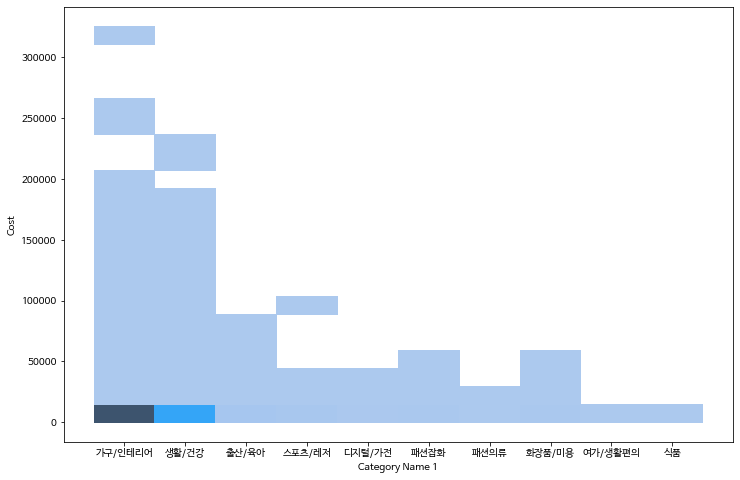

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(data= bidding_result, x= "Category Name 1", y= "Cost")
plt.show()

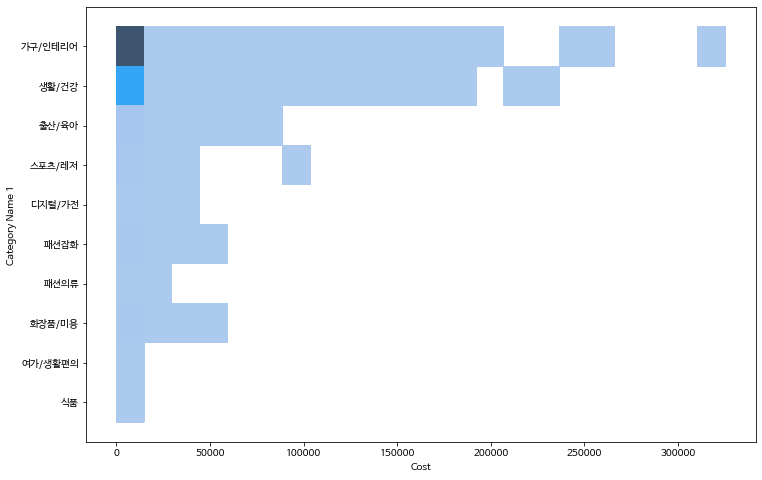

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(data= bidding_result, x= "Cost", y= "Category Name 1")
plt.show()

In [ ]:
#광고료가 제일 많이나온 상품은?


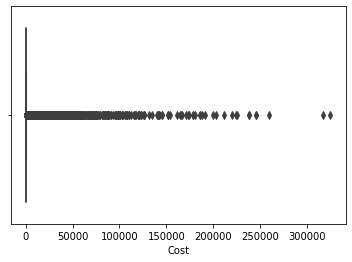

In [ ]:
sns.boxplot(data=bidding_result, x="Cost")

In [ ]:
a = bidding_result.loc[bidding_result['Category Name 1'].isin(bidding_result['Category Name 1'].value_counts()[:5].index)]
a

index  Impression  Click   Cost  Sum of AD rank  Bid  Price(PC)  \
0        3575092           3      0    0.0        3.000000   50     165900   
1        3575637           6      0    0.0        3.333333   50      10900   
2        4129259           7      0    0.0        8.000000   50     255000   
3        4131479          36      3  150.0        4.416667  140     190000   
4        4131482         224      0    0.0        5.696429   50     129000   
...          ...         ...    ...    ...             ...  ...        ...   
1337083  2566795           5      0    0.0       13.200000  500      19900   
1337084  2566880           3      0    0.0       17.000000  500      23900   
1337085  2566881           1      0    0.0        8.000000  500       2500   
1337086  2566891           2      0    0.0        4.000000  500      21000   
1337087  2566923          14      0    0.0       12.428571  500     128800   

         Price(Mobile)  Delivery Fee Category Name 1 Category Name 2  \
0               165900             0         가구/인테리어            침실가구   
1                10900             0         가구/인테리어          인테리어소품   
2               255000            -1         가구/인테리어            거실가구   
3               190000         20000         가구/인테리어        아동/주니어가구   
4               129000             0         가구/인테리어        아동/주니어가구   
...                ...           ...             ...             ...   
1337083          19900             0         가구/인테리어          인테리어소품   
1337084          23900          3000           생활/건강         문구/사무용품   
1337085           2500          3000         가구/인테리어          인테리어소품   
1337086          21000          3000           생활/건강         정원/원예용품   
1337087         128800             0         가구/인테리어          인테리어소품   

        Category Name 3 Category Name 4      date  
0               장롱/붙박이장            드레스룸  20221031  
1              아로마/캔들용품      아로마방향제/디퓨저  20221031  
2                    소파           패브릭소파  20221031  
3                책상의자세트             NaN  20221031  
4                    책상             NaN  20221031  
...                 ...             ...       ...  
1337083        아로마/캔들용품      아로마방향제/디퓨저  20230103  
1337084        이벤트/파티용품            데코용품  20230103  
1337085          기타장식용품             NaN  20230103  
1337086            화분받침             NaN  20230103  
1337087              액자      퍼즐/그림/사진액자  20230103  

[1320468 rows x 14 columns]

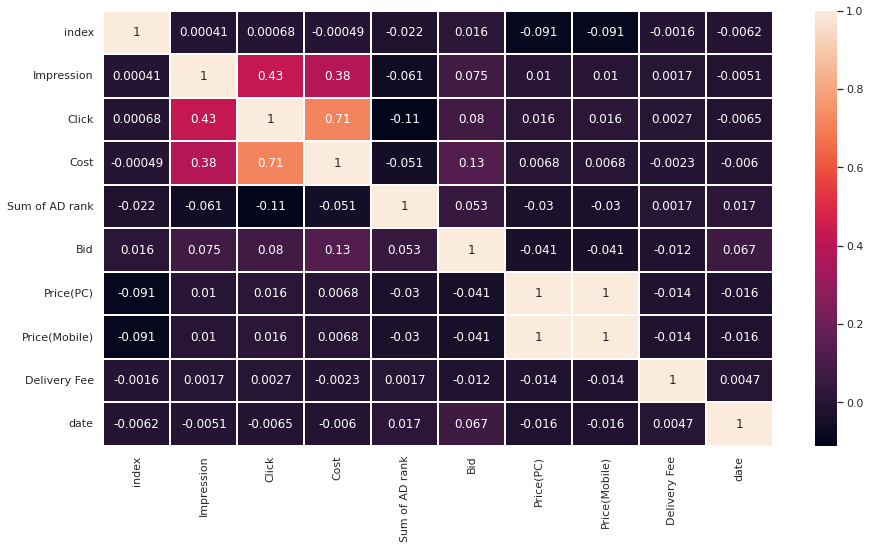

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)}, font ="Malgun Gothic", font_scale = 1)
sns.heatmap(data = bidding_result.corr(), annot=True, linewidths=1)
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.family'] = 'Malgun Gothic' # cost & click 상관관계 매우 높음/cost impression/click impression/click cost

In [ ]:
bidding_result.Click.value_counts()

0      1007240
1       180549
2        61235
3        28678
4        16125
        ...   
195          1
240          1
257          1
177          1
455          1
Name: Click, Length: 189, dtype: int64

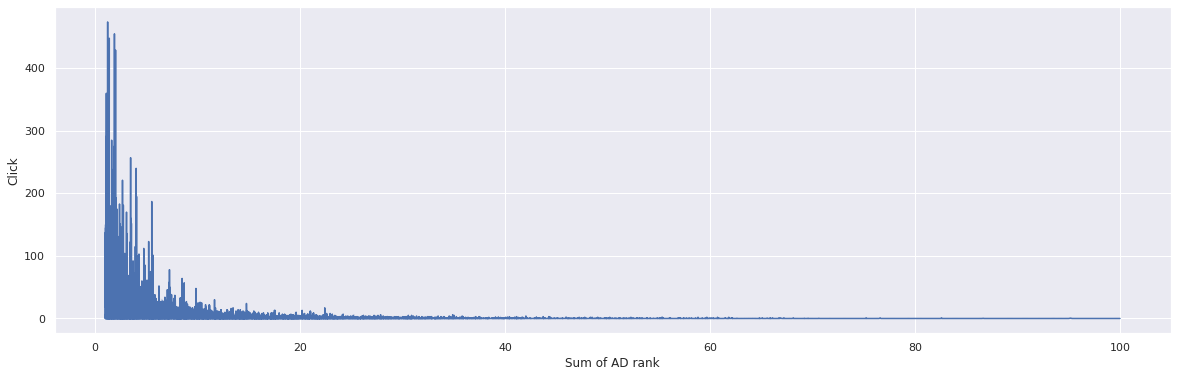

In [ ]:
plt.figure(figsize = (20, 6))
sns.lineplot(data = bidding_result, y = 'Click' , x = 'Sum of AD rank' )


In [ ]:
bidding_result.Cost.value_counts()

0.0        1007240
50.0         65986
100.0        22581
150.0        12026
200.0         8849
            ...   
26190.0          1
42270.0          1
10720.0          1
46930.0          1
10160.0          1
Name: Cost, Length: 2406, dtype: int64

In [ ]:
bidding_result.Cost.value_counts()

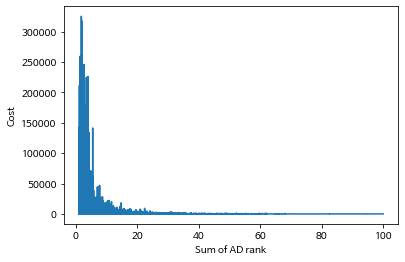

In [ ]:
# 금액대 별 나눠서 어디에 몰려있는지 더 체크
plt.figure(figsize = (20, 6))
sns.lineplot(data = bidding_result, y = 'Cost' , x = 'Sum of AD rank' )
# 1~5등사이에 몰려있다 -> 

In [ ]:
bidding_result[]

In [ ]:
minimum = bidding_result['Sum of AD rank'] == 1
mimumcost = bidding_result['Cost'] <= 150
subset_df = bidding_result[minimum & mimumcost]

subset_df

index  Impression  Click   Cost  Sum of AD rank  Bid  Price(PC)  \
0        3575092           3      0    0.0               1   50     165900   
1        3575637           6      0    0.0               1   50      10900   
2        4129259           7      0    0.0               1   50     255000   
3        4131479          36      3  150.0               1  140     190000   
4        4131482         224      0    0.0               1   50     129000   
...          ...         ...    ...    ...             ...  ...        ...   
1337083  2566795           5      0    0.0               1  500      19900   
1337084  2566880           3      0    0.0               1  500      23900   
1337085  2566881           1      0    0.0               1  500       2500   
1337086  2566891           2      0    0.0               1  500      21000   
1337087  2566923          14      0    0.0               1  500     128800   

         Price(Mobile)  Delivery Fee Category Name 1 Category Name 2  \
0               165900             0         가구/인테리어            침실가구   
1                10900             0         가구/인테리어          인테리어소품   
2               255000            -1         가구/인테리어            거실가구   
3               190000         20000         가구/인테리어        아동/주니어가구   
4               129000             0         가구/인테리어        아동/주니어가구   
...                ...           ...             ...             ...   
1337083          19900             0         가구/인테리어          인테리어소품   
1337084          23900          3000           생활/건강         문구/사무용품   
1337085           2500          3000         가구/인테리어          인테리어소품   
1337086          21000          3000           생활/건강         정원/원예용품   
1337087         128800             0         가구/인테리어          인테리어소품   

        Category Name 3 Category Name 4      date  
0               장롱/붙박이장            드레스룸  20221031  
1              아로마/캔들용품      아로마방향제/디퓨저  20221031  
2                    소파           패브릭소파  20221031  
3                책상의자세트             NaN  20221031  
4                    책상             NaN  20221031  
...                 ...             ...       ...  
1337083        아로마/캔들용품      아로마방향제/디퓨저  20230103  
1337084        이벤트/파티용품            데코용품  20230103  
1337085          기타장식용품             NaN  20230103  
1337086            화분받침             NaN  20230103  
1337087              액자      퍼즐/그림/사진액자  20230103  

[1136027 rows x 14 columns]

In [ ]:
minimum = bidding_result['Sum of AD rank'] = 1
minimum.min()

True